In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from load_data import get_data
from graphs import *

## Few notes:
* **total_clearance_between_visit** - wzgledem poprzedniej wizyty
* **clearance_between_visit** - wzgledem poczatku
* we group to **nereast** time group 


#### To-dos:
* Sprawdz ilosc grup z peaku w gory!
* Sprawdzic linear fit i non-linear fit
* Sprawdz rozne 
* Sprawdz methodologie
* Sila statystyczna (p-value)
* Sprawdz rozne kwartaly
* Pogrobic linie

#### Few **old** notes:
* The table above should include all information You need
* `wizyta po ilu zabiegach` -> can have some skipped zabiegy & can start at other point than 0
* `czas` -> defined as czas between this and next visit



# Hard-Coded Area:

In [2]:
non_moved_df = get_data(format_type='all')
moved_df = get_data(format_type='moved_to_0')
non0s_df = get_data(format_type='all_without_0s')

print('looking at the moved data:')
moved_df.head(10)

default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
default time group has GROUPS defined as: [0, 90, 180, 270, 360]
looking at the moved data:


,surname,time,summed_time,time_group,visit_number,total_clearance_between_visit,clearance_between_visit,------------,unmoved_visit_nr
0,1.Gasek,57,57,1,1,10.435940,10.435942,,1
1,1.Gasek,958,1015,4,2,14.814190,-1.710566,,2
2,1.Gasek,70,1085,1,3,10.424290,-2.877283,,3
3,1.Gasek,63,1148,1,4,24.239930,24.671780,,4
4,1.Gasek,238,1386,3,5,17.252580,-0.692089,,5
5,2. Kolodziejska,217,217,2,1,66.956580,66.956580,,1
6,2. Kolodziejska,42,259,0,2,41.810011,6.917547,,2
7,2. Kolodziejska,26,285,0,5,25.568145,-10.812106,,5
8,2. Kolodziejska,294,579,3,6,86.486312,22.210066,,6
9,4. Krzyszton,35,35,0,1,-46.287701,-17.363140,,3


In [3]:
# Print some overall info such as:
# nr of people w. different number of visits
# nr of people in different waiting buckets

In [4]:
grouped_by_visit = non_moved_df.groupby('time_group', as_index = False)
patients_per_bucket = grouped_by_visit['------------'].count()
patients_per_bucket.rename(columns = {'------------' : 'patients_in_bucket'}, inplace = True)
patients_per_bucket['time_group'] = patients_per_bucket['time_group'] * 90
patients_per_bucket
# patients_per_bucket

,time_group,patients_in_bucket
0,0,150
1,90,136
2,180,27
3,270,11
4,360,10


# Main Graphs
### Srednia poprawa miedzy wizytami:

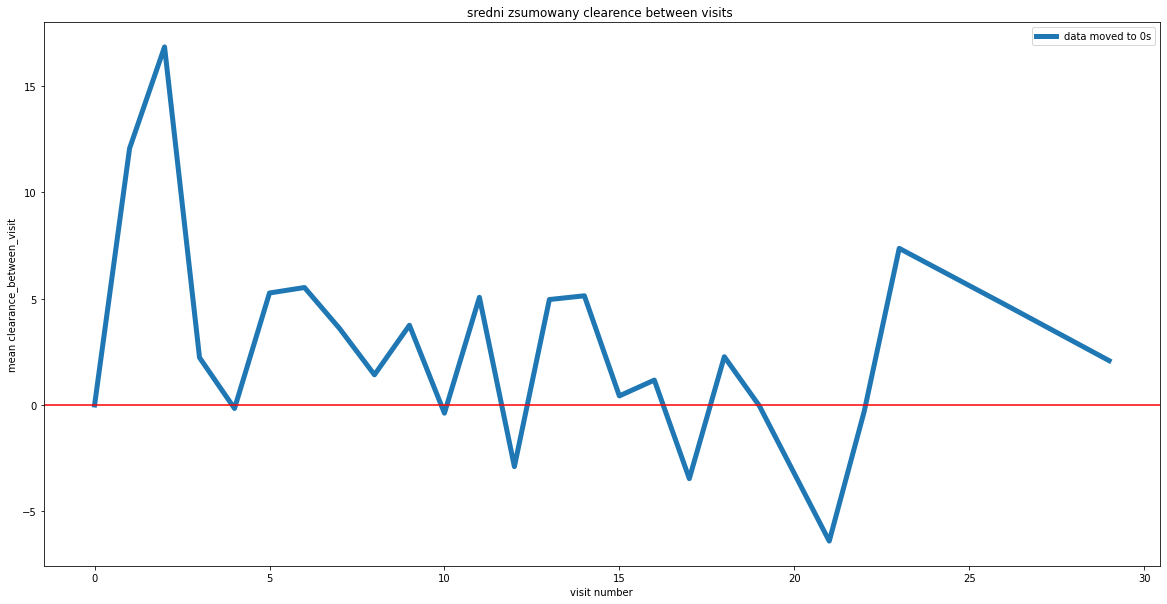

In [5]:
plt.figure(figsize=(20,10))
plt.title("srednia poprawa miedzy wizytami")
agg_column_graph(moved_df, label = 'data moved to 0s')
plt.legend()

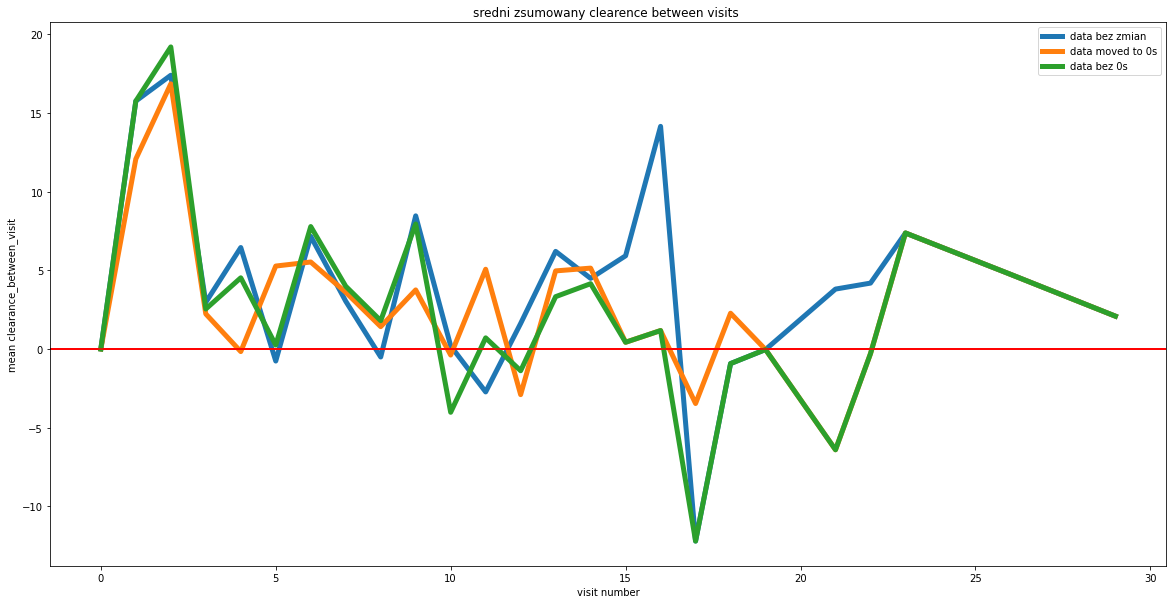

In [6]:
plt.figure(figsize=(20,10))
agg_column_graph(non_moved_df, label = 'data bez zmian')
agg_column_graph(moved_df, label = 'data moved to 0s')
agg_column_graph(non0s_df, label = 'data bez 0s')

   time_group  patients_in_bucket_x  patients_in_bucket_y  \
0           0                     3                    10   
1          90                     2                    10   
2         180                     2                     4   

   patients_in_bucket_x  patients_in_bucket_y  patients_in_bucket  
0                    38                    85                 150  
1                    24                    75                 136  
2                     9                    21                  27  
Empty DataFrame
Columns: [time_group, patients_in_bucket_x, patients_in_bucket_y, patients_in_bucket_x, patients_in_bucket_y, patients_in_bucket]
Index: []


/Users/szczekulskij/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:9199: FutureWarning: Passing 'suffixes' which cause duplicate columns {'patients_in_bucket_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,
/Users/szczekulskij/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/frame.py:9199: FutureWarning: Passing 'suffixes' which cause duplicate columns {'patients_in_bucket_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


,time_group,patients_in_bucket_x,patients_in_bucket_y,patients_in_bucket_x,patients_in_bucket_y,patients_in_bucket
0,0,3,10,38,85,150
1,90,2,10,24,75,136
2,180,2,4,9,21,27


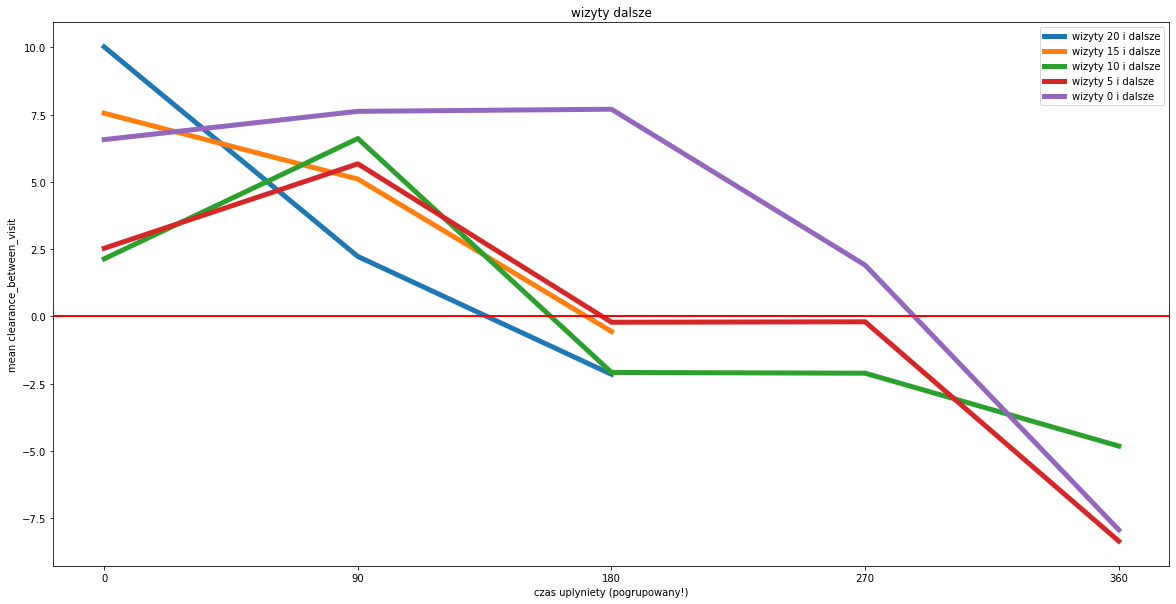

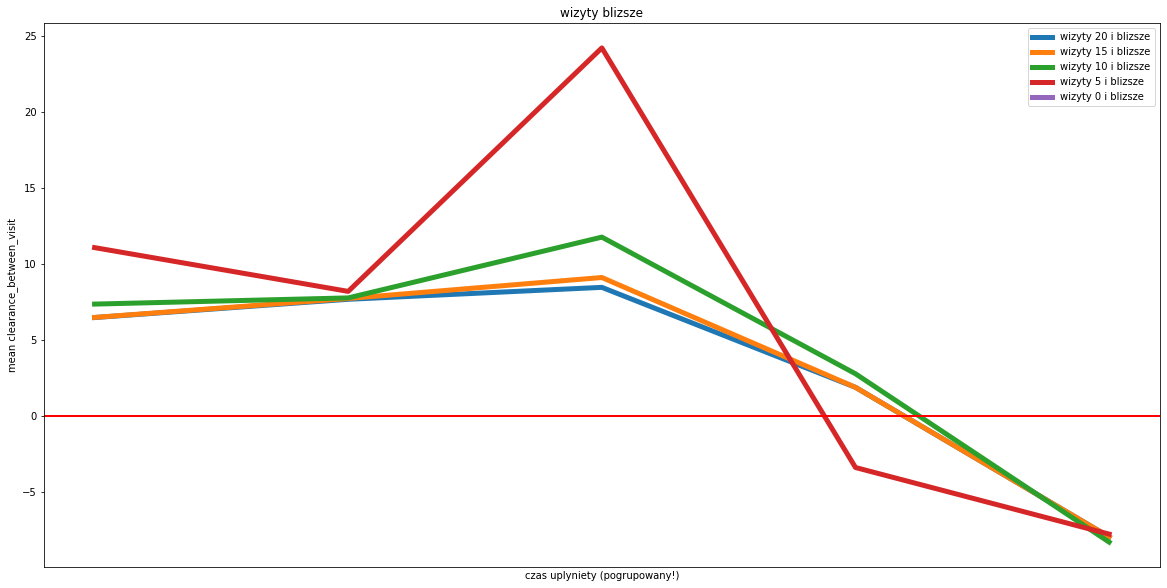

In [8]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False)
graph_multiple_time_group_based_avg_graph(non_moved_df, blizsze = True)

/Users/szczekulskij/side_projects/paper_publication/utils.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_group'] = labeled_group


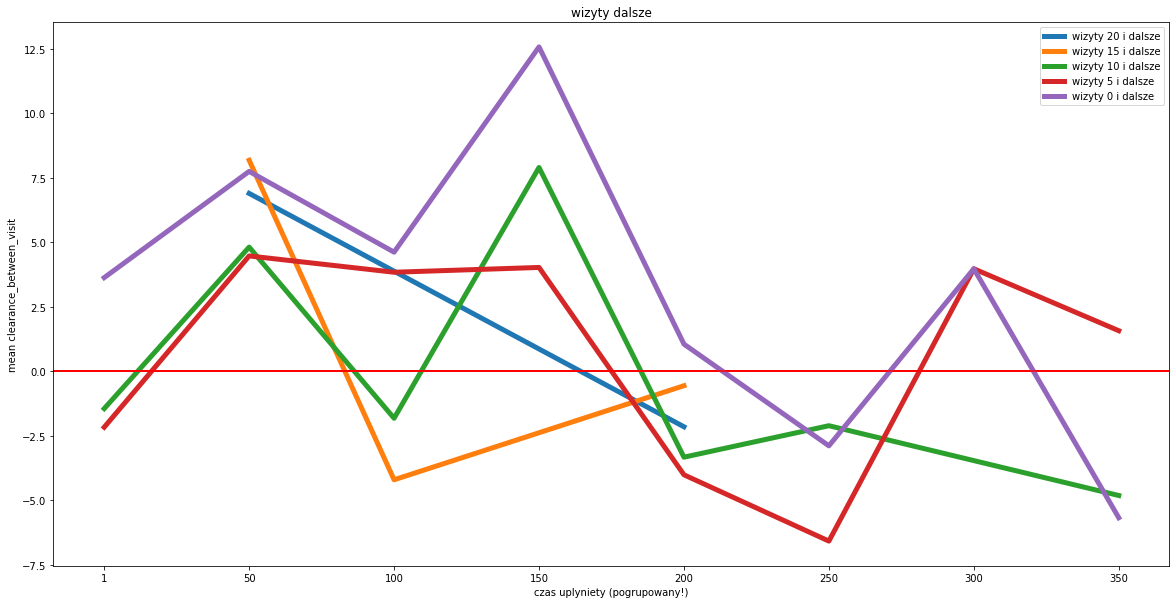

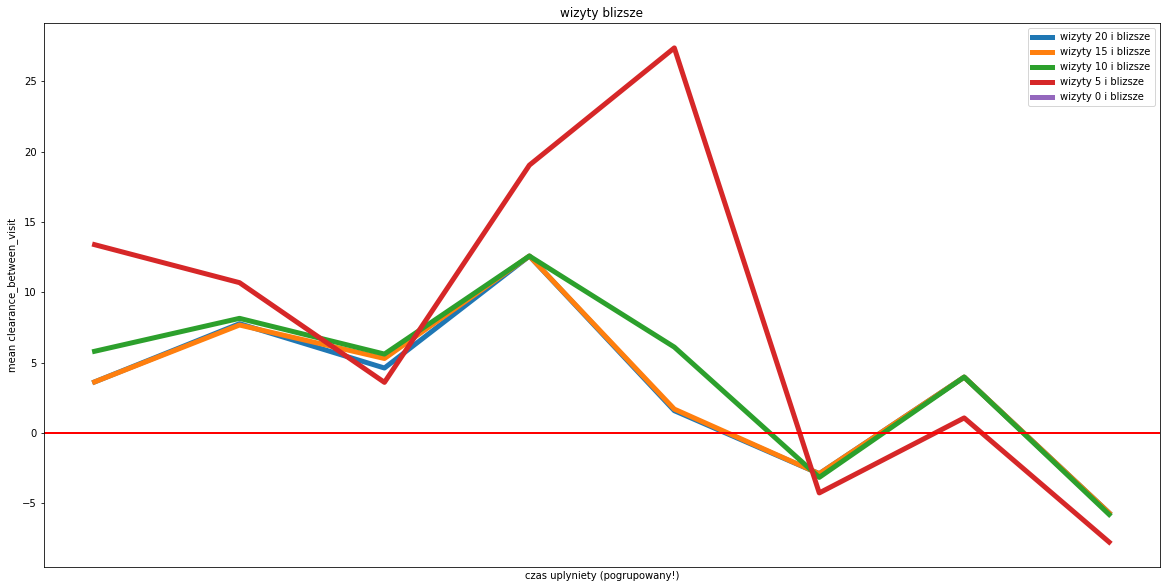

In [6]:
graph_multiple_time_group_based_avg_graph(non_moved_df,blizsze = False, GROUPS = [1,50,100,150,200,250,300,350], increment = 50)
graph_multiple_time_group_based_avg_graph(non_moved_df, blizsze = True, GROUPS = [1,50,100,150,200,250,300,350], increment = 50)

### All users plots:

In [7]:
# plot_all_users(non_moved_df, title = 'data bez zmian')
# plot_all_users(moved_df, title = 'data moved to 0s')
# plot_all_users(non0s_df, title = 'data bez 0s')

# Exploratory area: